In [ ]:
调节样本不均衡的方法：
一.class_weight:默认None（样本均衡）

    调节方法：1. 使用balanced模式
             2. 输入字典：{‘标签1’：'权重1'，‘标签2’：'权重2'}
    
二.SVC的接口fit的参数：sample_weight
    输入值为fit中的特征矩阵的每个样本的权重

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [2]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]  #设置两个簇的中心
clusters_std = [1.5,0.5]
X,y = make_blobs(n_samples=[class_1,class_2]
                ,centers=centers
                ,cluster_std=clusters_std
                ,random_state=0
                ,shuffle=False)

In [12]:
X

array([[ 2.64607852,  0.60023581],
       [ 1.46810698,  3.3613398 ],
       [ 2.80133699, -1.46591682],
       ...,
       [ 3.07478727,  1.95487808],
       [ 2.36582946,  1.96725581],
       [ 2.17408462,  2.33162904]])

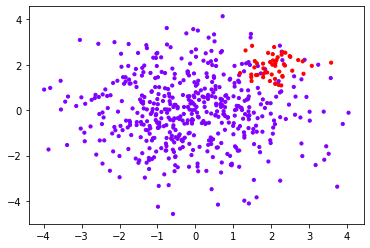

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=10)
plt.show()

In [8]:
# 不设置class_weight建模
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

In [9]:
# 设置class_weight建模
wclf = svm.SVC(kernel='linear',class_weight={1:10})
wclf.fit(X,y)

SVC(class_weight={1: 10}, kernel='linear')

In [10]:
clf.score(X,y)

0.9418181818181818

In [11]:
wclf.score(X,y)
# 可以更好的捕获少数类，但是却牺牲了更多的多数类。所以模型整体精度下降

0.9127272727272727

In [13]:
# Confusion Matrics 混淆矩阵
# Accuracy：11+00/11+00+10+01
# Precision(P)：11/11+01   （预测正确的少数类占预测为少数类的比例 - 表示对少数类的预测正确率）
(y[(y==clf.predict(X))]==1).sum()/(clf.predict(X)==1).sum()

0.7142857142857143

In [ ]:
(y[(y==wclf.predict(X))]==1).sum()/(wclf.predict(X)==1).sum()

In [15]:
# Recall 召回率: 11/11+10 （预测正确的少数类的样本数占真实少数类的比例）
(y[(y==clf.predict(X))]==1).sum()/(y==1).sum()

0.6

In [16]:
(y[(y==wclf.predict(X))]==1).sum()/(y==1).sum()

1.0

In [ ]:
# F1 measure: 2/(1/precision+1/recall)
# F1越接近1，表示precision和recall都不会太低 - 是精确度和召回率的平衡指标
# 假负率： 1-recall

In [17]:
# Specificity 真负率：00/00+01  衡量模型将多数类判断正确的能力
# 1-Specificity 假正率  衡量模型将多数类判断错误的能力
(y[(y==clf.predict(X))]==0).sum()/(y==0).sum()

0.976

In [18]:
(y[(y==wclf.predict(X))]==0).sum()/(y==0).sum()

0.904

In [ ]:
Sklearn里面混淆矩阵
sklean.metrics.confusion_matrix
sklearn.metrics.accuracy_score
sklearn.metrics.precision_score
sklearn.metrics.recall_score
sklearn.metrics.precision_recall_curve  精确度-召回率平衡曲线，可以展示不同阈值下的精确度和召回率如何变化
sklearn.metrics.f1_score

In [ ]:
ROC曲线：The receiver operating characteristic curve  受试者操作特性曲线
衡量模型在尽量捕捉少数类的时候，误伤多数类的情况如何变化
这是一条一不同阈值下的假正率FPR为横坐标，不同阈值下的召回率Recall为纵坐标的曲线

In [ ]:
# SVM中的概率：probability 是否启用概率估计
# 布尔值，默认为False
# =True 之后，SVC的接口predict_ptoba和predict_log_prob将会生效

In [4]:
clf_proba = svm.SVC(kernel='linear',C=1,probability=True).fit(X,y)

In [5]:
clf_proba.predict_proba(X)   # 每个样本被分成0和1的概率

array([[0.6933413 , 0.3066587 ],
       [0.2870034 , 0.7129966 ],
       [0.95933278, 0.04066722],
       ...,
       [0.17671715, 0.82328285],
       [0.37746012, 0.62253988],
       [0.33945887, 0.66054113]])

In [7]:
clf_proba.predict_proba(X).shape

(550, 2)

In [10]:
clf_proba.decision_function(X) # 样本到决策边界的距离

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [11]:
clf_proba.decision_function(X).shape

(550,)

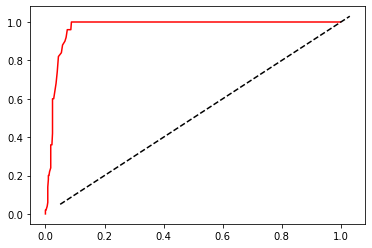

In [15]:
# 画ROC曲线

recall = []
FPR = []

# 概率：（最小值，最大值，50个） endpoint表示不要取到最大值
probrange = np.linspace(clf_proba.predict_proba(X).min(),clf_proba.predict_proba(X).max(),50,endpoint=False)

from sklearn.metrics import confusion_matrix as CM, recall_score as R

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])   #真实标签，预测标签，注明少数类
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())

recall.sort()
FPR.sort()

plt.plot(FPR,recall,c='red')
plt.plot(probrange+0.05,probrange+0.05,c='black',linestyle='--')
plt.show()

In [ ]:
# 左上角：模型很好
# recall立刻提升，但FPR增大缓慢

In [ ]:
Sklearn中的ROC曲线和AUC面积
sklearn.metrics.roc_curve(真实标签，概率/置信度/decision_fuction，pos_label=少数类标签)  返回FPR, Recall，阈值threshold
                roc——auc_score

In [16]:
from sklearn.metrics import roc_curve
FPR, recall, thresholds = roc_curve(y, clf_proba.decision_function(X),pos_label=1)

In [17]:
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [18]:
recall

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [19]:
thresholds  #用距离计算出的阈值

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [21]:
from sklearn.metrics import roc_auc_score as AUC
area = AUC(y, clf_proba.decision_function(X))  # AUC越接近1越好

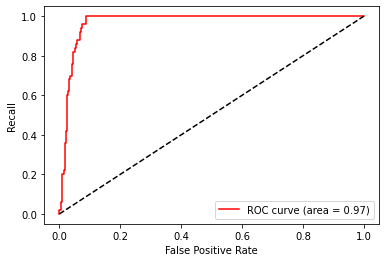

In [26]:
plt.figure()
plt.plot(FPR, recall,color='red'
        ,label='ROC curve (area = {:.2f})'.format(area))
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 利用roc曲线求解最佳阈值
找出 recall-FPR 的最大值

In [27]:
max((recall-FPR).tolist())

0.914

In [28]:
maxindex = (recall-FPR).tolist().index(max((recall-FPR).tolist()))
thresholds[maxindex]

-1.0860191749391461

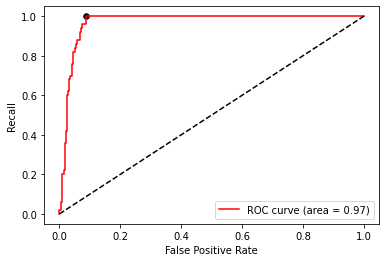

In [31]:
# 把最大值的点画在图中
plt.figure()
plt.plot(FPR, recall,color='red'
        ,label='ROC curve (area = {:.2f})'.format(area))
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],color='black',s=30)  # 横坐标，纵坐标。s是大小

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()